In [1]:
import sys
sys.path.append('..')

In [11]:
from core.dataset import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
load_dir = 'D:/Data/hoffmanlab/featureselection/data/'
ligands = ['CpG', 'FLA', 'FSL', 'LPS', 'P3K', 'PIC', 'R84', 'TNF']
sheet_type = 'am'

In [4]:
trip2 = ['CpG', 'FLA', 'P3K', 'FSL', 'R84']

## gonna try to optimize the best set of features for tier 2 ligands (most difficult to classify)

In [6]:
dataset = Data(load_dir, trip2, sheet_type, merge=True)

In [13]:
X, Y = dataset.iloc[:, [i for i in range(984)]].to_numpy(), dataset.iloc[:, [984]].to_numpy().reshape(-1,)

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.1, random_state=42)

In [18]:
model1 = xgb.XGBClassifier(tree_method='gpu_hist', use_label_encoder=False)

In [20]:
model1.fit(X_train, y_train)

[16:32:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [21]:
pred = model1.predict(X_val)
cr = classification_report(y_val, pred, target_names=trip2)
print(cr)

              precision    recall  f1-score   support

         CpG       0.62      0.74      0.68       199
         FLA       0.66      0.54      0.59       149
         P3K       0.66      0.65      0.65       142
         FSL       0.68      0.69      0.68       198
         R84       0.88      0.84      0.86       274

    accuracy                           0.71       962
   macro avg       0.70      0.69      0.69       962
weighted avg       0.72      0.71      0.71       962



In [22]:
firev = model1.feature_importances_.argsort()
fi = firev[::-1]

<AxesSubplot:>

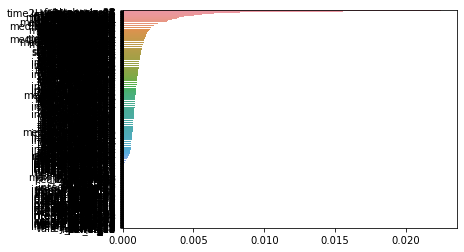

In [24]:
sns.barplot(x=model1.feature_importances_[fi], y=dataset.columns[fi])

<AxesSubplot:>

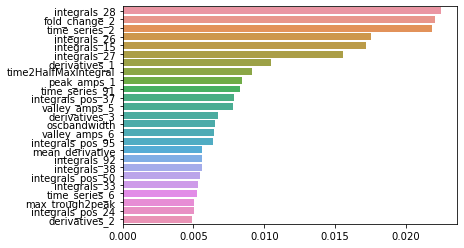

In [27]:
sns.barplot(x=model1.feature_importances_[fi][:25], y=dataset.columns[fi][:25])

* integrals, fold change, time series, derivatives, time2halfmaxintegral, peak amps, integrals pos, valley amps, oscbandwidth, mean derivative, max trough2peak
* 11 distinct features

In [56]:
vec11df = dataset.loc[:, dataset.columns[fi][:25]]

In [28]:
vec11 = dataset.loc[:, dataset.columns[fi][:25]].to_numpy()

In [30]:
X_train, X_val, y_train, y_val = train_test_split(vec11, Y, test_size=0.1, random_state=42)

In [31]:
model2 = xgb.XGBClassifier(tree_method='gpu_hist', use_label_encoder=False)

In [32]:
model2.fit(X_train, y_train)

[16:39:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [33]:
pred2 = model2.predict(X_val)
cr2 = classification_report(y_val, pred2, target_names=trip2)
print(cr2)

              precision    recall  f1-score   support

         CpG       0.61      0.72      0.66       199
         FLA       0.70      0.54      0.61       149
         P3K       0.59      0.62      0.60       142
         FSL       0.67      0.66      0.67       198
         R84       0.87      0.85      0.86       274

    accuracy                           0.70       962
   macro avg       0.69      0.68      0.68       962
weighted avg       0.71      0.70      0.70       962



#### dataset trained on top 25 features (11 distinct features) has nearly identical performance to all 985 features
* improvement in R84 classification, detioration in every other ligand

In [37]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

In [60]:
%matplotlib inline
from xgboost import plot_tree
from matplotlib.pylab import rcParams

<AxesSubplot:>

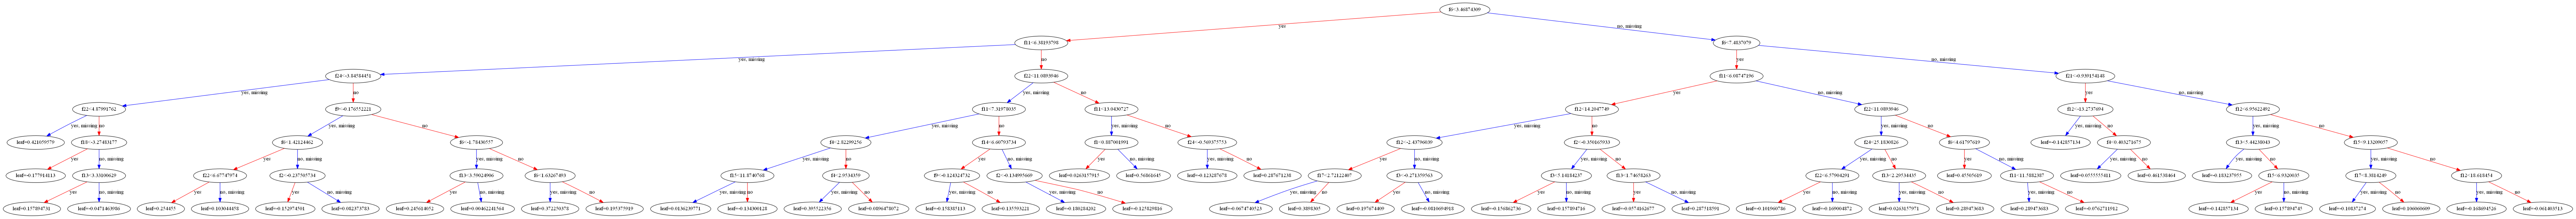

In [55]:
plot_tree(model2)

In [58]:
x = model2.feature_importances_.argsort()
x = x[::-1]
vec11df.columns[x]

Index(['time_series_2', 'fold_change_2', 'derivatives_1', 'derivatives_3',
       'oscbandwidth', 'derivatives_2', 'valley_amps_5',
       'time2HalfMaxIntegral', 'valley_amps_6', 'max_trough2peak',
       'time_series_6', 'integrals_15', 'mean_derivative', 'peak_amps_1',
       'integrals_27', 'integrals_38', 'time_series_91', 'integrals_26',
       'integrals_33', 'integrals_92', 'integrals_pos_24', 'integrals_pos_95',
       'integrals_pos_37', 'integrals_pos_50', 'integrals_28'],
      dtype='object')

<AxesSubplot:>

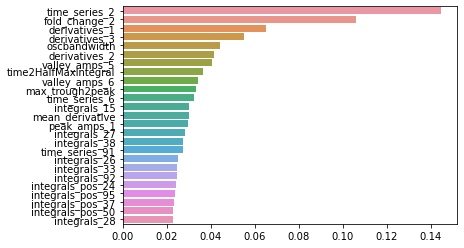

In [61]:
sns.barplot(x = model2.feature_importances_[x], y=vec11df.columns[x])

### notable reordering of feature importance after fitting the model on just the top 25 features
* what if i did 50 -> 25 -> 15 -> ... etc

In [62]:
vec15df = vec11df.loc[:, vec11df.columns[x][:15]]

In [64]:
vec15 = vec15df.to_numpy()

In [65]:
X_train, X_val, y_train, y_val = train_test_split(vec15, Y, test_size=0.1, random_state=42)

In [66]:
model3 = xgb.XGBClassifier(tree_method='gpu_hist', use_label_encoder=False)

In [67]:
model3.fit(X_train, y_train)

[16:57:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [68]:
pred3 = model3.predict(X_val)
cr3 = classification_report(y_val, pred3, target_names=trip2)
print(cr3)

              precision    recall  f1-score   support

         CpG       0.58      0.64      0.61       199
         FLA       0.59      0.51      0.55       149
         P3K       0.57      0.61      0.59       142
         FSL       0.62      0.62      0.62       198
         R84       0.88      0.85      0.87       274

    accuracy                           0.67       962
   macro avg       0.65      0.65      0.65       962
weighted avg       0.67      0.67      0.67       962



#### R84 goes up again, every other ligand goes down

<AxesSubplot:>

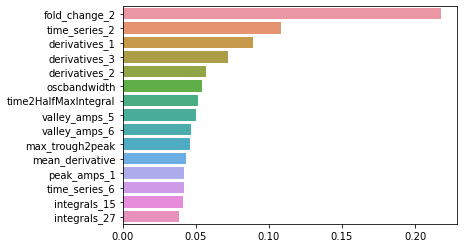

In [69]:
x = model3.feature_importances_.argsort()
x = x[::-1]
sns.barplot(x=model3.feature_importances_[x], y=vec15df.columns[x])

### 985 -> 500 -> 250 -> 125 -> 50 -> 25

In [106]:
def sfit(dataset, features):
    df = dataset.loc[:, features]
    data = dataset.loc[:, features].to_numpy()
    Y = dataset.iloc[:, [984]].to_numpy().reshape(-1, )
    X_train, X_val, y_train, y_val = train_test_split(data, Y, test_size=0.1, random_state=50)
    model = xgb.XGBClassifier(tree_method='gpu_hist', use_label_encoder=False)
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    cr = classification_report(y_val, pred, target_names=trip2)
    
    x = model.feature_importances_.argsort()
    x = x[::-1]
    f = df.columns[x]
    return cr, f

In [107]:
d1 = dataset.iloc[:, [i for i in range(984)]]

In [108]:
cr1, f1 = sfit(dataset, list(d1.columns))
# f1 is all 984 features sorted in order of importance

[17:13:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [118]:
print(cr1)

              precision    recall  f1-score   support

         CpG       0.59      0.67      0.63       186
         FLA       0.60      0.56      0.58       167
         P3K       0.69      0.61      0.65       166
         FSL       0.67      0.63      0.65       179
         R84       0.84      0.89      0.87       264

    accuracy                           0.69       962
   macro avg       0.68      0.67      0.67       962
weighted avg       0.69      0.69      0.69       962



In [115]:
cr2, f2 = sfit(dataset, list(f1[:500]))
# f2 is 500 features sorted in order of importance

[17:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [117]:
print(cr2)
# improvement!

              precision    recall  f1-score   support

         CpG       0.56      0.66      0.60       186
         FLA       0.61      0.54      0.58       167
         P3K       0.74      0.61      0.67       166
         FSL       0.67      0.66      0.67       179
         R84       0.85      0.90      0.87       264

    accuracy                           0.70       962
   macro avg       0.69      0.68      0.68       962
weighted avg       0.70      0.70      0.70       962



In [120]:
cr3, f3 = sfit(dataset, list(f2[:250]))
# f3 is 250 features sorted in order of importance

[17:15:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [122]:
print(cr3)
# R84 continues to improve while other ligands perform worse
# this new set of changes primarily impacted FSL 
# somewhere in those 250 lost features are ones that are important to FSL

              precision    recall  f1-score   support

         CpG       0.56      0.68      0.61       186
         FLA       0.60      0.56      0.58       167
         P3K       0.72      0.61      0.66       166
         FSL       0.65      0.60      0.62       179
         R84       0.86      0.91      0.88       264

    accuracy                           0.69       962
   macro avg       0.68      0.67      0.67       962
weighted avg       0.69      0.69      0.69       962



In [127]:
cr4, f4 = sfit(dataset, list(f3[:125]))
# 125 features sorted

[17:18:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [129]:
print(cr4)
# best performance for FLA thus far
# FSL improved
# CpG/P3K trivial difference
# R84 worsen

              precision    recall  f1-score   support

         CpG       0.57      0.65      0.61       186
         FLA       0.65      0.55      0.60       167
         P3K       0.70      0.60      0.65       166
         FSL       0.65      0.64      0.65       179
         R84       0.83      0.91      0.87       264

    accuracy                           0.69       962
   macro avg       0.68      0.67      0.67       962
weighted avg       0.69      0.69      0.69       962



In [130]:
cr5, f5 = sfit(dataset, list(f4[:75]))
# top 75 features

[17:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [131]:
print(cr5)
# R84 peak f1-score
# P3K no change
# FSL/FLA/CpG worsen

              precision    recall  f1-score   support

         CpG       0.56      0.65      0.60       186
         FLA       0.60      0.57      0.58       167
         P3K       0.71      0.60      0.65       166
         FSL       0.65      0.62      0.63       179
         R84       0.86      0.91      0.89       264

    accuracy                           0.69       962
   macro avg       0.68      0.67      0.67       962
weighted avg       0.69      0.69      0.69       962



## best performance so far with least amount of features

In [132]:
cr6, f6 = sfit(dataset, list(f5[:40]))

[17:20:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [134]:
print(cr6)
# same CpG score as 984 features
# FLA +
# similar score to 500 feature

              precision    recall  f1-score   support

         CpG       0.60      0.66      0.63       186
         FLA       0.62      0.58      0.60       167
         P3K       0.71      0.60      0.65       166
         FSL       0.67      0.65      0.66       179
         R84       0.84      0.91      0.87       264

    accuracy                           0.70       962
   macro avg       0.69      0.68      0.68       962
weighted avg       0.70      0.70      0.70       962



In [135]:
cr7, f7 = sfit(dataset, list(f6[:20]))

[17:21:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [136]:
print(cr7)

              precision    recall  f1-score   support

         CpG       0.56      0.64      0.60       186
         FLA       0.61      0.54      0.57       167
         P3K       0.68      0.57      0.62       166
         FSL       0.64      0.61      0.62       179
         R84       0.81      0.90      0.85       264

    accuracy                           0.68       962
   macro avg       0.66      0.65      0.65       962
weighted avg       0.67      0.68      0.67       962



In [137]:
cr8, f8 = sfit(dataset, list(f7[:10]))

[17:22:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [138]:
print(cr8)

              precision    recall  f1-score   support

         CpG       0.51      0.65      0.57       186
         FLA       0.55      0.44      0.49       167
         P3K       0.60      0.55      0.58       166
         FSL       0.59      0.54      0.56       179
         R84       0.85      0.89      0.87       264

    accuracy                           0.64       962
   macro avg       0.62      0.61      0.61       962
weighted avg       0.64      0.64      0.64       962

